In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('data/sac_find_best_nbody.csv')
df.drop('name', axis=1, inplace=True)

# Matmul FLOP
flop = df['size'] * df['size'] * (2 * df['size'] - 1)
df['GFLOP/J'] = (flop / 1e9) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']
df['GFLOP/J SD'] = 0 * df['energysd'] # How to compute this?

df['energy'] -= df['runtime'] * 3.85

df

,pin,size,threads,runtime,runtimesd,energy,energysd,GFLOP/J,GFLOP/s,GFLOP/J SD
0,True,1000,1,0.002317,0.000003,0.028785,0.007829,53.016855,862.828039,0.0
1,True,1000,2,0.002344,0.000013,0.029907,0.008006,51.349458,852.994013,0.0
2,True,1000,3,0.001564,0.000009,0.026301,0.009835,61.844698,1277.936889,0.0
3,True,1000,4,0.001172,0.000007,0.019869,0.007621,81.991991,1706.097228,0.0
4,True,1000,5,0.000937,0.000006,0.019928,0.007192,84.932564,2133.040249,0.0
...,...,...,...,...,...,...,...,...,...,...
123,False,50000,12,1.248161,0.087383,50.587815,3.198390,4513.141422,200292.715509,0.0
124,False,50000,13,1.180711,0.095402,52.638464,3.611631,4371.793235,211734.746661,0.0
125,False,50000,14,1.125720,0.096110,51.170870,3.678851,4504.062269,222077.771525,0.0
126,False,50000,15,1.074453,0.118496,53.414641,4.935258,4343.908236,232674.233234,0.0


In [140]:
def twin_plot(df, ax, bar_y, line_y, sd, bar_label=None, line_label=None, bar_min=True):
    if bar_label == None: bar_label = bar_y
    if line_label == None: line_label = line_y
    
    x = list(range(0, len(df)))
    
    sns.barplot(x=x, y=df[bar_y], label=bar_label, legend=False, ax=ax)
    axt = ax.twinx()
    sns.lineplot(x=x, y=df[line_y], label=line_label, legend=False, color='r', ax=axt)

    ax.set_ylim((0,None))
    axt.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=df[bar_y], yerr=df[sd], fmt='none', c='black')

    for bar in ax.patches:
        if ((bar_min and bar.get_height() == df[bar_y].min()) or
            (not bar_min and bar.get_height() == df[bar_y].max())):
            bar.set_color('g')
            break

    ax.set_ylabel(bar_label)
    axt.set_ylabel(line_label)

    return axt

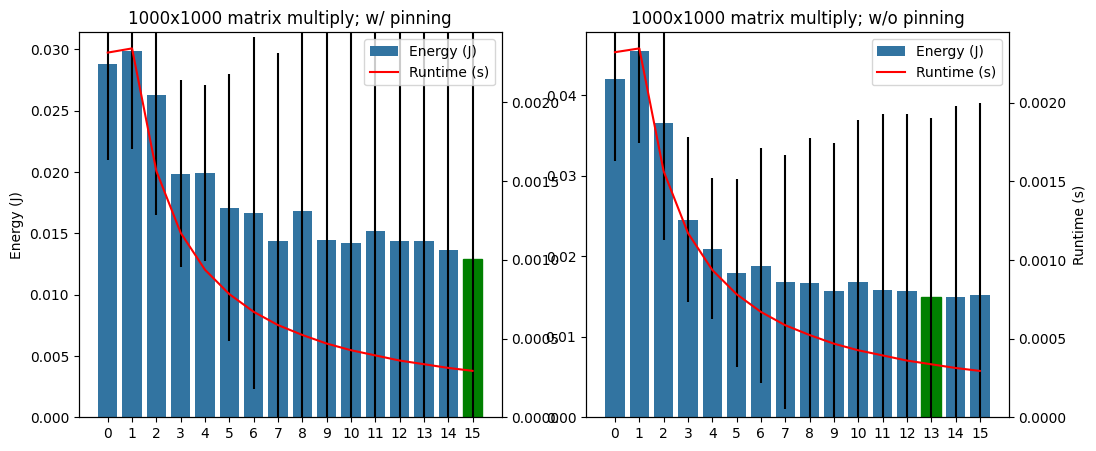

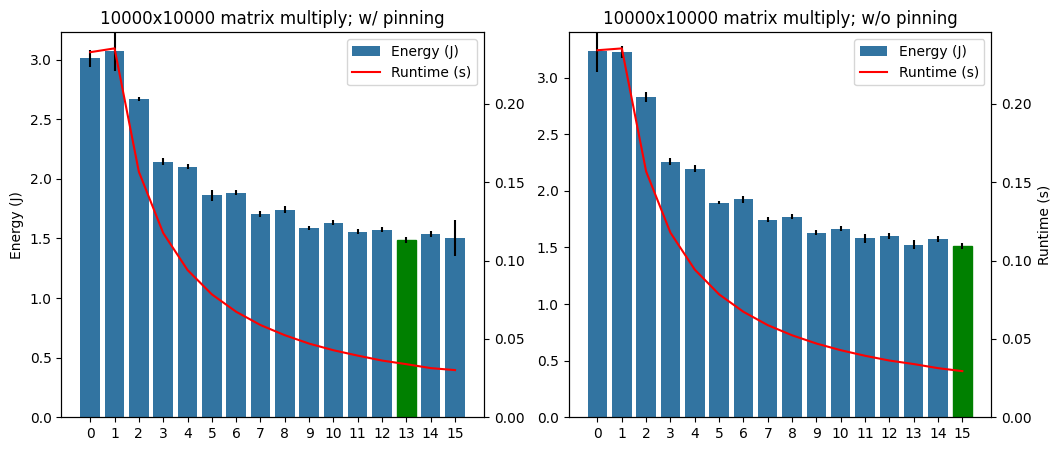

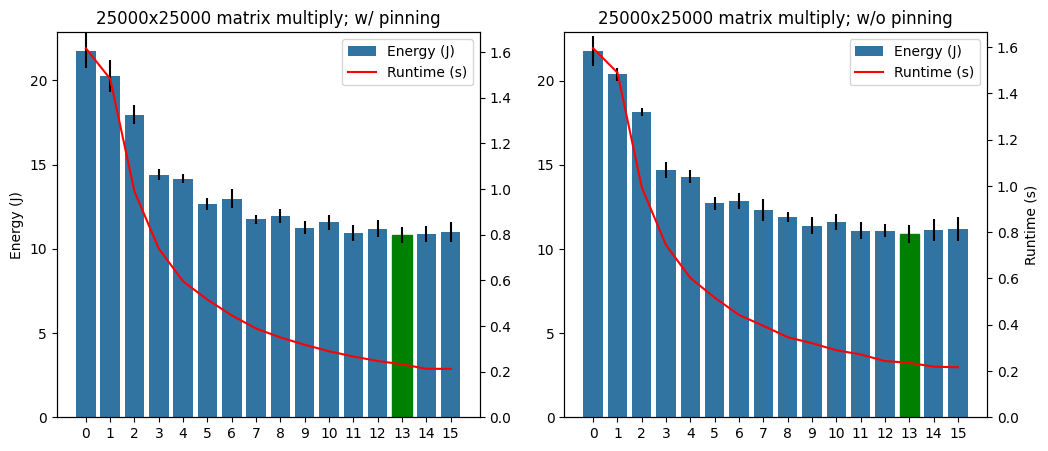

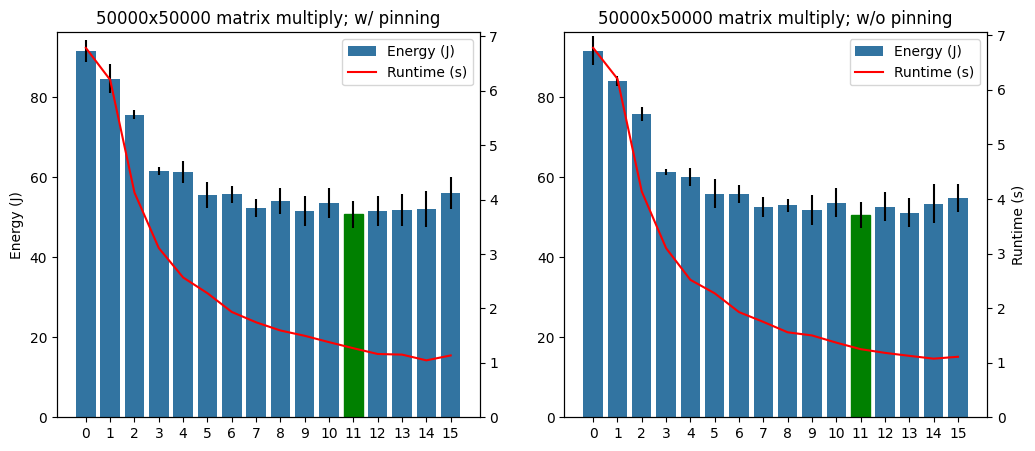

In [141]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    twin_plot(wo_pin, ax2, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size}x{size} matrix multiply; w/ pinning')
    ax2.set_title(f'{size}x{size} matrix multiply; w/o pinning')

plt.show()

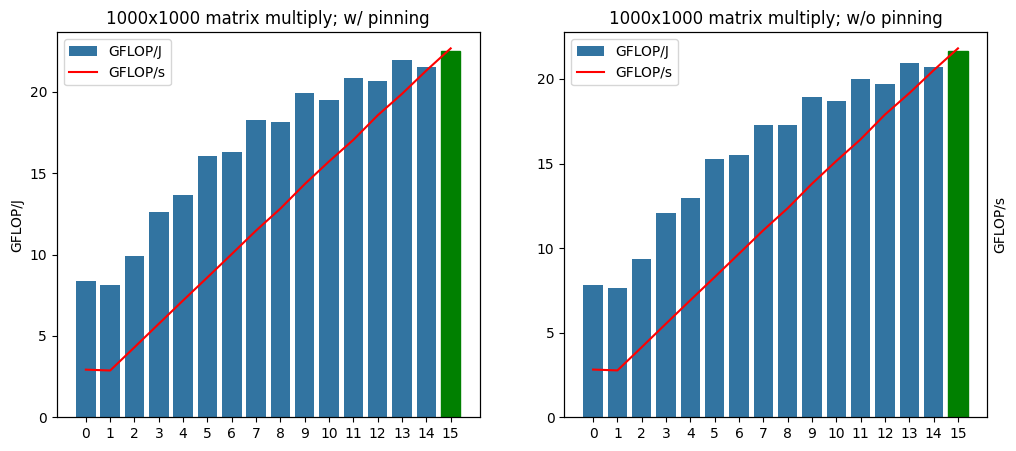

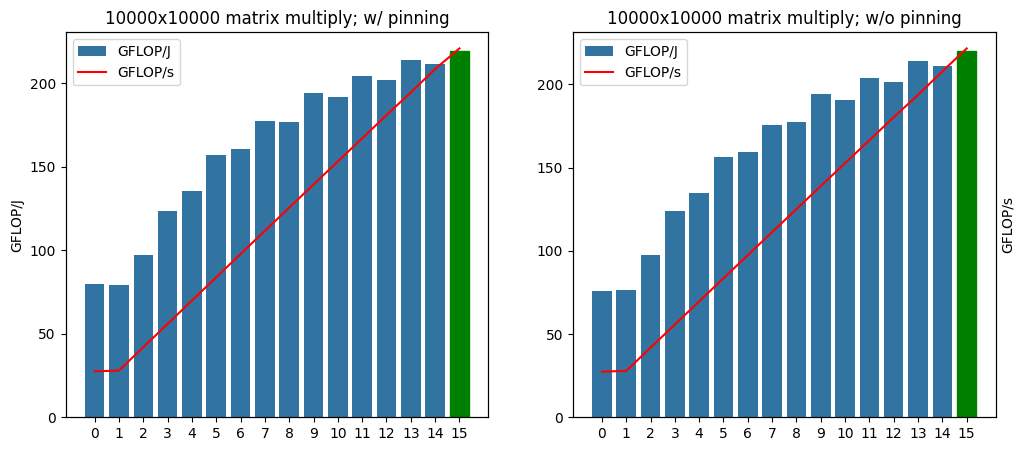

In [120]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'GFLOP/J', 'GFLOP/s', 'GFLOP/J SD', bar_min=False)
    twin_plot(wo_pin, ax2, 'GFLOP/J', 'GFLOP/s', 'GFLOP/J SD', bar_min=False)
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size}x{size} matrix multiply; w/ pinning')
    ax2.set_title(f'{size}x{size} matrix multiply; w/o pinning')

plt.show()